## Datenanalyse
- get an exampletory np_array
- get a feeling for its structure 
- try scipy methods
- simulate the example np_array with an np_array of your own making
- build a connection to the Fit-Gauss result

In [51]:
#einmalig ausführen 
#!{sys.executable} -m pip install scipy
#!{sys.executable} -m pip install sklearn

In [52]:
from matplotlib import pyplot as plt
import numpy as np

load example np_array and plot it

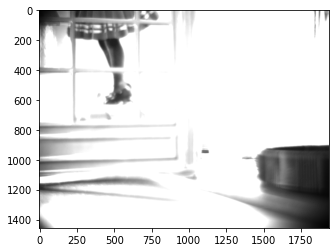

In [53]:
with open('test.npy', 'rb') as f:
    example_np_a = np.load(f)
plt.imshow(example_np_a, cmap='gray')
plt.show()

### example array structure

In [54]:
example_np_a.shape

(1456, 1936, 1)

In [55]:
#better shape for example_np_a would be (1456,1936)

#trying out reshaping:
test_a = np.arange(12).reshape(6,2,1)
print(test_a)
reshape_a = test_a.reshape(6,2)
reshape_a

[[[ 0]
  [ 1]]

 [[ 2]
  [ 3]]

 [[ 4]
  [ 5]]

 [[ 6]
  [ 7]]

 [[ 8]
  [ 9]]

 [[10]
  [11]]]


array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [56]:
reshape_example_np_a = example_np_a.reshape(1456, 1936)
print (reshape_example_np_a.shape)
print (reshape_example_np_a)

(1456, 1936)
[[ 12  12  12 ... 170 177 172]
 [ 11  12  12 ... 180 186 173]
 [ 12  12  12 ... 187 189 174]
 ...
 [ 45  46  47 ...  11  12  11]
 [ 44  45  47 ...  11  11  12]
 [ 42  46  45 ...  11  11  10]]


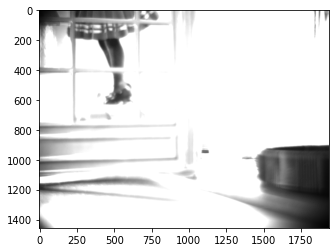

In [57]:
plt.imshow(reshape_example_np_a, cmap='gray')
plt.show()

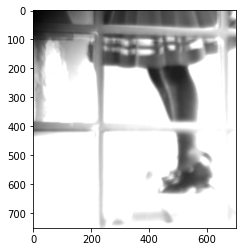

In [58]:
#obere linke Ecke ausgeben 
top_left_corner = reshape_example_np_a[0:750, 0:700]
plt.imshow(top_left_corner, cmap='gray')
plt.show()

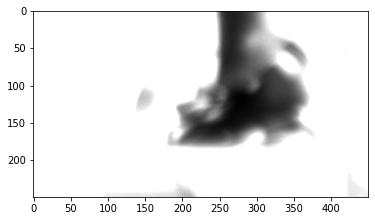

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 240, 242, 244],
       [255, 255, 255, ..., 243, 236, 240],
       [255, 255, 255, ..., 239, 242, 241]], dtype=uint8)

In [59]:
#einen Bereich in der Mitte ausgeben 
def np_area (twoD_np_a, x_tl, y_tl, x_br, y_br): #tl -top_left, br -bottom right -> Eckkoordinaten
    return twoD_np_a[y_tl:y_br, x_tl:x_br]
middle = np_area (top_left_corner, 250,450, 750,700)
plt.imshow(middle, cmap='gray')
plt.show()
middle

wichtig: die Indexe im np_bild_array entsprechen nicht den Koordinaten von Pixel in einem Koordinatensystem! Die y-Achse ist falsch herum: oben ist die 0 und unten der max Wert

## scipy.npimage test

In [89]:
from scipy.ndimage import label, find_objects
from sklearn.cluster import KMeans

#### Lichtflecke finden

Try Kmeans clustering

In [61]:
####Daten für Clustering aufbereiten

# Change shape sodass alle Punkte im Bild einen Wert haben 
w, h, d = original_shape = tuple(example_np_a.shape)
assert d == 1
example_np_shaped = np.reshape(example_np_a, (w * h, d))
print(example_np_shaped.shape)
#print(example_np_shaped)

#apperently Kmeans is more efficient, wenn der Wertebereich so klein ist
fit_ready = np.array(example_np_shaped, dtype=np.float64) / 255
print(fit_ready)

(2818816, 1)
[[0.04705882]
 [0.04705882]
 [0.04705882]
 ...
 [0.04313725]
 [0.04313725]
 [0.03921569]]


[2 2 2 ... 2 2 2]


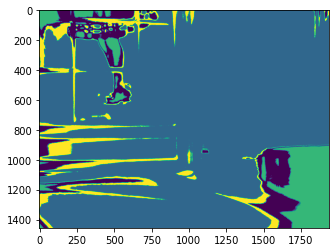

In [62]:
####finden der Lichtflecke by using clustering
#hier als Clusteralg. kmeans, später noch mit Kmediods and so on vergleichen (performance, korrektheit)

def cluster (np_a, n_cluster):
    kmeans = KMeans(n_clusters=n_cluster, random_state=2)
    kmeans_labels = kmeans.fit(np_a).labels_
    return kmeans_labels

exam_cluster = cluster(fit_ready, 4)
print(exam_cluster)

final_exam_cluster = exam_cluster.reshape(w, h, -1)
plt.imshow(final_exam_cluster)
plt.show()

(112500, 1)


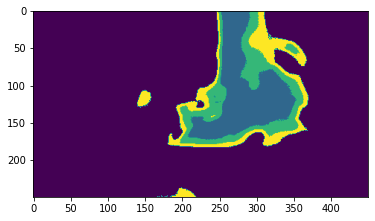

In [63]:
#test smaller image, Berechnugsdauer deutlich kürzer?
w, h = original_shape = tuple(middle.shape)
example_np_shaped = np.reshape(middle, (w * h, 1))
print(example_np_shaped.shape)

fit_ready = np.array(example_np_shaped, dtype=np.float64) / 255
exam_cluster = cluster(fit_ready, 4)

final_exam_cluster = exam_cluster.reshape(w, h, -1)
plt.imshow(final_exam_cluster)
plt.show()

- clustering auch bei kleinerem Bild zeitintensive
- Daten vorbereiten (reshaping): zeitintensiv
- nochmal checken, vielleicht mit anderem Datenformat (x-Achsenwert, y-Achsenwert, Farbwert) anderes Ergbnis

weitere Idee: Clustering nutzen um verschiede graustufungsgruppen zu finden, von denen die größte auswählen und deren wertebereich nehmen und als "Hintergrund" Werte speichern und dann bei Labeln benutzen. 

anderer Ansatz: mit labeln

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


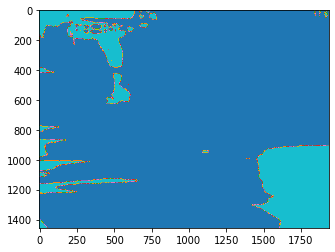

In [82]:
#label  example 
filtered_ex = (reshape_example_np_a < 151 ) # Wahl für Schwellwert schwierig 
print(filtered_ex)
plt.imshow(filtered_ex,cmap='tab10')
plt.show()

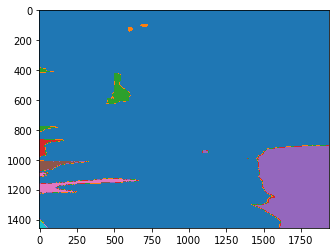

In [90]:
labeled_ex, num_label_ex = label (filtered_ex)
plt.imshow(labeled_ex,cmap='tab10')
plt.show()

In [87]:
#Idee um Schwellwert zu finden 

#Most frequent value in array:
import scipy.stats
scipy.stats.mode(reshape_example_np_a)[0][0][0]

# wenn alles weiß außer labels dann < Schwellwert, sonst > Schwellwert in Abfrage

255

1271


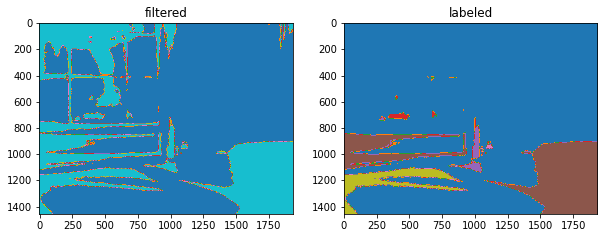

In [97]:
filtered_ex = (reshape_example_np_a < 255 ) # Schwellwert wie oben gewählt
labeled_ex, num_label_ex = label (filtered_ex)
print (num_label_ex)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(filtered_ex,cmap='tab10')
ax.set_title('filtered')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(labeled_ex,cmap='tab10')
ax.set_title('labeled')
plt.show()

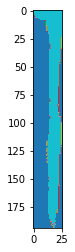

In [116]:
#slicing labeled image, so only the important part vor the object is left

image_part = find_objects(labeled_ex)[4]
plt.imshow(labeled_ex[image_part],cmap='tab10')
plt.show()


hier beim Bsp Bild noch über Tausend Labels und dementsprechend über tausend image parts
die Anzahhl der Parts sollte also beim Enderegebnis nochmal genau überprüft werden 

### connect to Fit-Gauß
erste Probeanalyse

<class 'numpy.ndarray'>
(1456, 1936, 3)
uint8
[[[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 ...

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [3 3 3]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [3 3 3]
  ...
  [2 2 2]
  [2 2 2]
  [2 2 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [2 2 2]
  [3 3 3]
  [2 2 2]]]


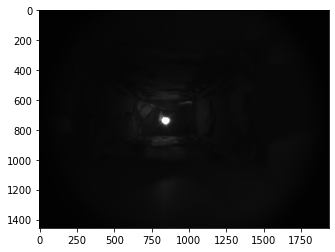

In [118]:
####erstes Probebild von Versuch 2 mit vimba software erzeugt
####Bild mit opencv laden

import cv2
im = cv2.imread('D:\\HZB\\BA_epics_camera\\Testaufbau\\Versuch2\\Stoff_im_Gang_Tuch_vor_Handy.bmp')

print(type(im))
print(im.shape)
print(im.dtype)

plt.imshow(im, cmap='gray')
plt.show()

In [117]:
# reshape image
import numpy as np
img1 = cv2.imread('opencvlogo.png')
row,col,ch = img1.shape
g = [ ]  #the list in which we will stuff single grayscale pixel value inplace of 3 RBG values
#this function converts each RGB pixel value into single Grayscale pixel value and appends that value to list 'g'
def rgb2gray(Img):
    global g
    row,col,CHANNEL = Img.shape
    for i in range(row) :
        for j in range(col):
        a =      (   Img[i,j,0]*0.07  +  Img[i,j,1]*0.72 +    Img[i,j,2] *0.21   ) #the algorithm i used id , G =  B*0.07 + G*0.72 + R* 0.21
                                                                                   #I found it online
        g.append(a)
rgb2gray(img1)  #convert the img1 into grayscale
gr = np.array(g)


ValueError: cannot reshape array of size 8456448 into shape (1456,1936)

In [70]:
####label areas

#schwellwert finden 
scipy.stats.mode(handy_light)[0][0][0]

In [71]:
####bestimme entscheidende area und benutze nur noch die area of interest
####hier area of interest manuell, später mit algorithmus finden

In [72]:
####Fit-Gauß Analyse für diesen Bereich 